In [29]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"selimym0","key":"65364727a97974300cdd71e274d1fce3"}'}

In [30]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [31]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store

ecommerce-behavior-data-from-multi-category-store.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = "ecommerce-behavior-data-from-multi-category-store.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("unzipping done")


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.display.width = 1200

In [7]:
df = pd.read_csv('2019-Oct.csv')

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


# **RQ 1**

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?

view        4.411244
cart        0.100224
purchase    0.080356
Name: event_type, dtype: float64


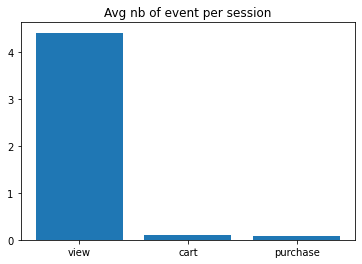

In [8]:
# RQ 1 point a

unique_sessions_nb=df['user_session'].value_counts(dropna=True).shape[0]
occurences_events=df['event_type'].value_counts(dropna=True)
occurences_events=occurences_events/unique_sessions_nb

plt.bar(occurences_events.index, height=occurences_events)
plt.title('Avg nb of event per session');

print(occurences_events) #The scale doesn't let us see the difference netween the two last

In [27]:
# RQ 1 point b

# new_df = df_oct[['event_type','product_id','user_session']]
# new_df = new_df.groupby([new_df['user_session'], new_df['product_id'],new_df['event_type']]).agg(count = ('event_type', 'count'))

# DELETE CELL AND INSERT SAEED CODE HERE

In [10]:
# RQ 1 point c

df_copy=df[['event_type','product_id','category_code','price','user_id','user_session']]

df_copy=df_copy[df_copy['event_type']!='view']

events_nb_df=df_copy['event_type'].value_counts(dropna=True)

print("The probability that product added to the cart are bought is : ",events_nb_df.iloc[1]/events_nb_df.iloc[0])

# I initially wanted to remove duplicate events because if customers add and remove an item several times before buying it, then this probability is not 100% accurate.
# However doing that would also neglect multiple purchase of the same item during the same session. I tried it but I obtained more purchase events than cart events which is absurd.

# events_nb_df=events_nb_df.drop_duplicates()
# events_nb_df=events_nb_df['event_type'].value_counts(dropna=True)
# new_answer = (events_nb_df.iloc[1]/events_nb_df.iloc[0])


The probability that product added to the cart are bought is :  0.8017659705822673


In [11]:
# RQ 1 point d

cart_df = df[df['event_type'] == 'cart']
cart_df = cart_df[['event_time','product_id','user_session']]

purchase_df = df[df['event_type'] == 'purchase']
purchase_df = purchase_df[['event_time','product_id','user_session']]


purchase_df.rename(columns={'event_time':'event_end'}, inplace=True)

cart_df=cart_df.merge(purchase_df, how='inner', on=['product_id',"user_session"])
cart_df['start']=cart_df.apply( lambda x : datetime.strptime(x['event_time'].split(' ')[1],'%H:%M:%S'), axis = 1)
cart_df['end']=cart_df.apply( lambda x : datetime.strptime(x['event_end'].split(' ')[1],'%H:%M:%S'), axis = 1)
cart_df['time_to_buy']=cart_df['end']-cart_df['start']

avg_time_cart_buy=cart_df['time_to_buy'].mean().seconds

print("on average people take ",avg_time_cart_buy," seconds to buy the item once it's added to the cart") #This is the answer

on average people take  127  seconds to buy the item once it's added to the cart


(557740, 7)

In [12]:
# RQ 1 point e

view_df = df[df['event_type'] == 'view']
view_df = view_df[['event_time','product_id','user_session']]

print("size before removing duplicates : ",view_df.shape[0])
view_df = view_df.drop_duplicates(subset=['product_id','user_session'])
print("size after removing duplicates : ",view_df.shape[0])

cart_df = df[df['event_type'] == 'cart']
cart_df = cart_df[['event_time','product_id','user_session']]


cart_df.rename(columns={'event_time':'event_end'}, inplace=True)

compare_view_cart=view_df.merge(cart_df, how='inner', on=['product_id',"user_session"])
compare_view_cart['start']=compare_view_cart.apply( lambda x : datetime.strptime(x['event_time'].split(' ')[1],'%H:%M:%S'), axis = 1)
compare_view_cart['end']=compare_view_cart.apply( lambda x : datetime.strptime(x['event_end'].split(' ')[1],'%H:%M:%S'), axis = 1)
compare_view_cart['time_to_buy']=compare_view_cart['end']-compare_view_cart['start']
print("on average people take ",compare_view_cart['time_to_buy'].mean().seconds," seconds to addd to cart the item once it's been viewed")

avg_time_view_cart=compare_view_cart['time_to_buy'].mean().seconds
print("on average people take ", avg_time_cart_buy + avg_time_view_cart," seconds to buy the item once it's been viewed")

print("The rate at which a complete funnel is executed is : ", 1/(avg_time_cart_buy + avg_time_view_cart) )

size before removing duplicates :  40779399
size after removing duplicates :  27783702
on average people take  201  seconds to addd to cart the item once it's been viewed
on average people take  34  seconds to buy the item once it's been viewed
